# Classification Using Naive Bayes and Tree Based Algorithm

# Challenge

In [1]:
#Importing all relevant Python Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',size=14)
import seaborn as sb
sb.set(style='white')
sb.set(style='whitegrid',color_codes=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap

In [2]:
# Reading CSV train data file into DataFrame

df = pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C5_S4_HR_Data_Challenge.csv')

# previewing the data
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

## Data Exploration & Visualization

In [4]:
# exploring the existing data types
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [5]:
# exploring the numeric data types
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [6]:
 # exploring the strings
df_string=df.select_dtypes(exclude=[np.number])
df_string.head()

,Department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


### Task 1.1 : Visualizing the impact of salary on employee retention

[]

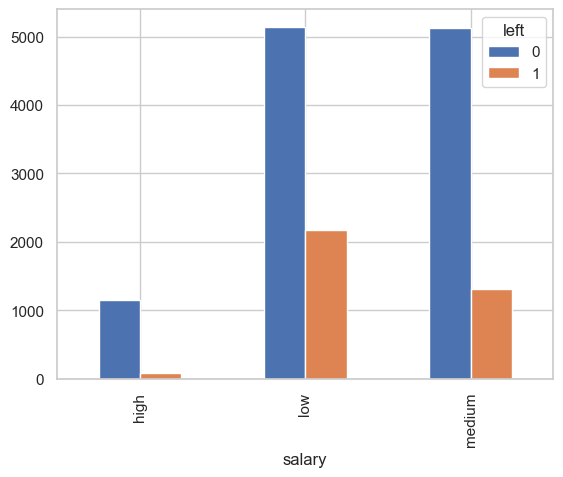

In [7]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar')
plt.plot()

In [8]:
#From the above chart, Salary seems to play an important role in regards to the people who left the company.Majority of employees having low salaries have left the organization

### Task 1.2 : Visualizing departmentwise employee retention rate

[]

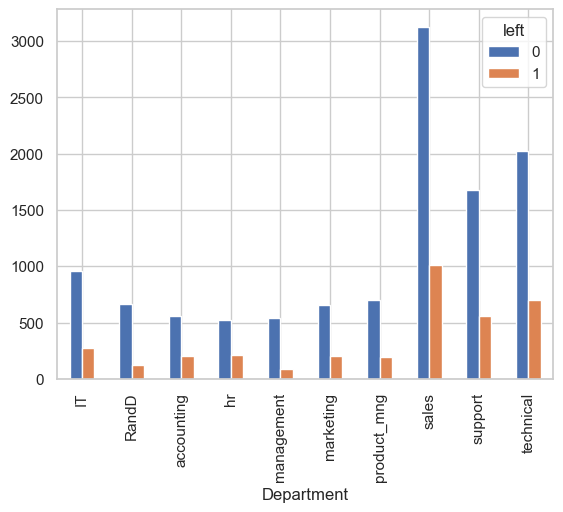

In [9]:
pd.crosstab(df['Department'],df['left']).plot(kind='bar')
plt.plot()

In [10]:
#From the above chart, Department seems to play an important role in regards to the people who left the company.Majority of employees from Sales Department have left the organization

## Data Preprocessing

### Task 2.1 Access the missing value

In [11]:
 # checking missing values in data
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [12]:
#No missing value present in the dataset

### Task 2.2 Detect the correlations in dataset

[]

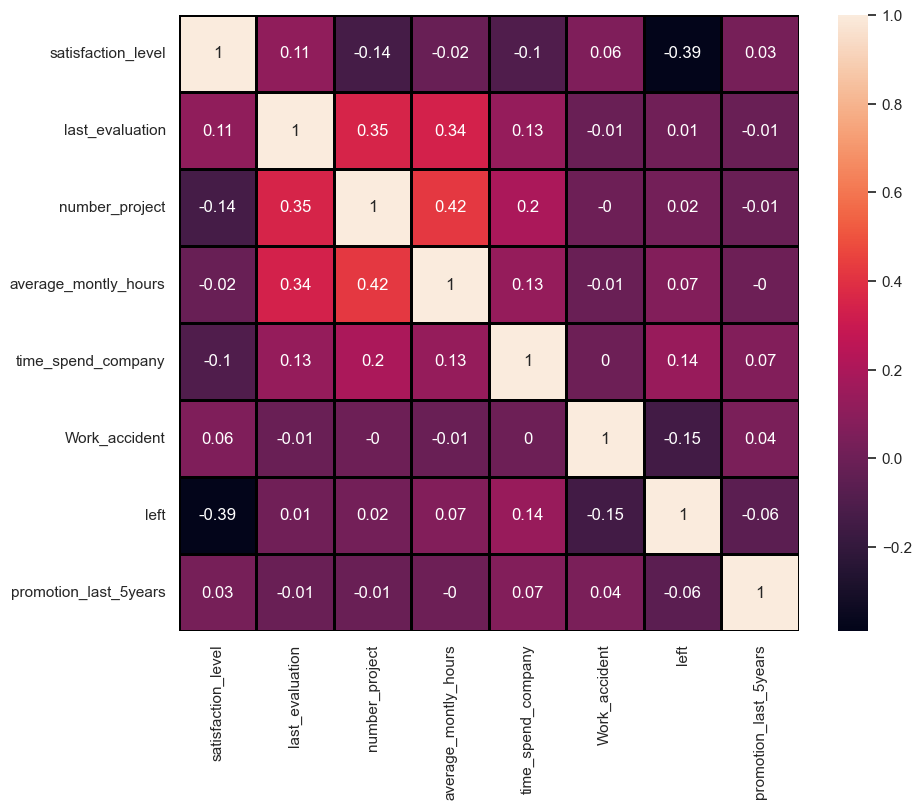

In [13]:
#Data quality | Detect correlations
plt.figure(figsize=(10,8))
sb.heatmap(round(df.corr(),2),annot=True,linewidths=0.8,linecolor='black')
plt.plot()

In [14]:
#not removing any feature from this dataset, as we can see none of the columns are highly correlated

### Task 2.3: Convert Salary and Department Data into text data

In [15]:
from sklearn.preprocessing import LabelEncoder

#Encoding Department variable to numeric variable
df['Department']=LabelEncoder().fit_transform(df['Department'])

#Encoding salary variable to numeric variable
df['salary']=LabelEncoder().fit_transform(df['Department'])

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,7
1,0.80,0.86,5,262,6,0,1,0,7,7
2,0.11,0.88,7,272,4,0,1,0,7,7
3,0.72,0.87,5,223,5,0,1,0,7,7
4,0.37,0.52,2,159,3,0,1,0,7,7


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  int32  
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int32(1), int64(7)
memory usage: 1.1 MB


In [17]:
#Not excluding any column now

### Task 2.4 : Split the data into train and test sets.

In [18]:
X=df.drop(['left'],axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,7,7
1,0.80,0.86,5,262,6,0,0,7,7
2,0.11,0.88,7,272,4,0,0,7,7
3,0.72,0.87,5,223,5,0,0,7,7
4,0.37,0.52,2,159,3,0,0,7,7


In [19]:
Y=df['left']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [20]:
#Here splitting data in train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)
print('Size of training X data : ',X_train.shape)
print('Size of training Y data : ',Y_train.shape)
print('Size of test X data : ',X_test.shape)
print('Size of test Y data : ',Y_test.shape)

Size of training X data :  (10499, 9)
Size of training Y data :  (10499,)
Size of test X data :  (4500, 9)
Size of test Y data :  (4500,)


In [21]:
#Scaling Training Data
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

## Modelling - Naive Bayes

### Task 3.1 : Train the model and predict the outcome for test data

In [22]:
# Naive Bayes - training the model
gnm=GaussianNB()
gnm=gnm.fit(X_train,Y_train)

#Using the trained model to predict the outcome of the X_Test dataset
Y_pred=gnm.predict(X_test)
Y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

### Task 3.2 : Calculate accuracy of training dataset

In [23]:
# evalating the model on the train data
print('Accuracy of training data : ',round(gnm.score(X_train,Y_train) * 100, 2))

Accuracy of training data :  79.27


### Task 3.3 : Test for the accuracy of the model on the test data

In [24]:
# evaluating accuracy of the model
print('Accuracy of model : ',round(accuracy_score(Y_test,Y_pred) * 100, 2))

Accuracy of model :  80.13


In [25]:
# evalating the model on the test data
print('Accuracy of test data : ',round(gnm.score(X_test,Y_test) * 100, 2))

Accuracy of test data :  80.13


### Which factors seems to be most important one when people are leaving the company?

In [26]:
from sklearn.inspection import permutation_importance
a=permutation_importance(gnm,X_test,Y_test)
a1=pd.DataFrame([a.importances_mean],columns=X.columns)
a1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.063378,0.002578,0.040178,0.005956,0.019289,0.023111,0.002978,0.001067,0.001067


In [27]:
#satisfaction_level seems to be most important one when people are leaving the company

## Modelling - Decision Tree

### Task 4.1 : Train the model and predict the outcome for test data

In [28]:
# Decision Tree - training the model
clf=DecisionTreeClassifier(max_depth=3)  #Creating Decision Tree classifer object
clf=clf.fit(X_train,Y_train)  # Training Decision Tree Classifer

#Using the trained model to predict the outcome of the X_Test dataset
Y_pred1=clf.predict(X_test)
Y_pred1

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

### Task 4.2 : Calculate accuracy of training dataset

In [29]:
# evalating a Decision Tree model on the train data
print('Accuracy of training data : ',round(clf.score(X_train,Y_train) * 100, 2))

Accuracy of training data :  95.26


### Task 4.3 : Test for the accuracy of the model on the test data

In [30]:
# evaluating accuracy of a Decision Tree model
print('Accuracy of model : ',round(accuracy_score(Y_test,Y_pred1) * 100, 2))

Accuracy of model :  92.44


In [31]:
# evalating a Decision Tree model on the test data
print('Accuracy of test data : ',round(clf.score(X_test,Y_test) * 100, 2))

Accuracy of test data :  92.44


### Use a Decision Tree to classify if a person going to leave the company

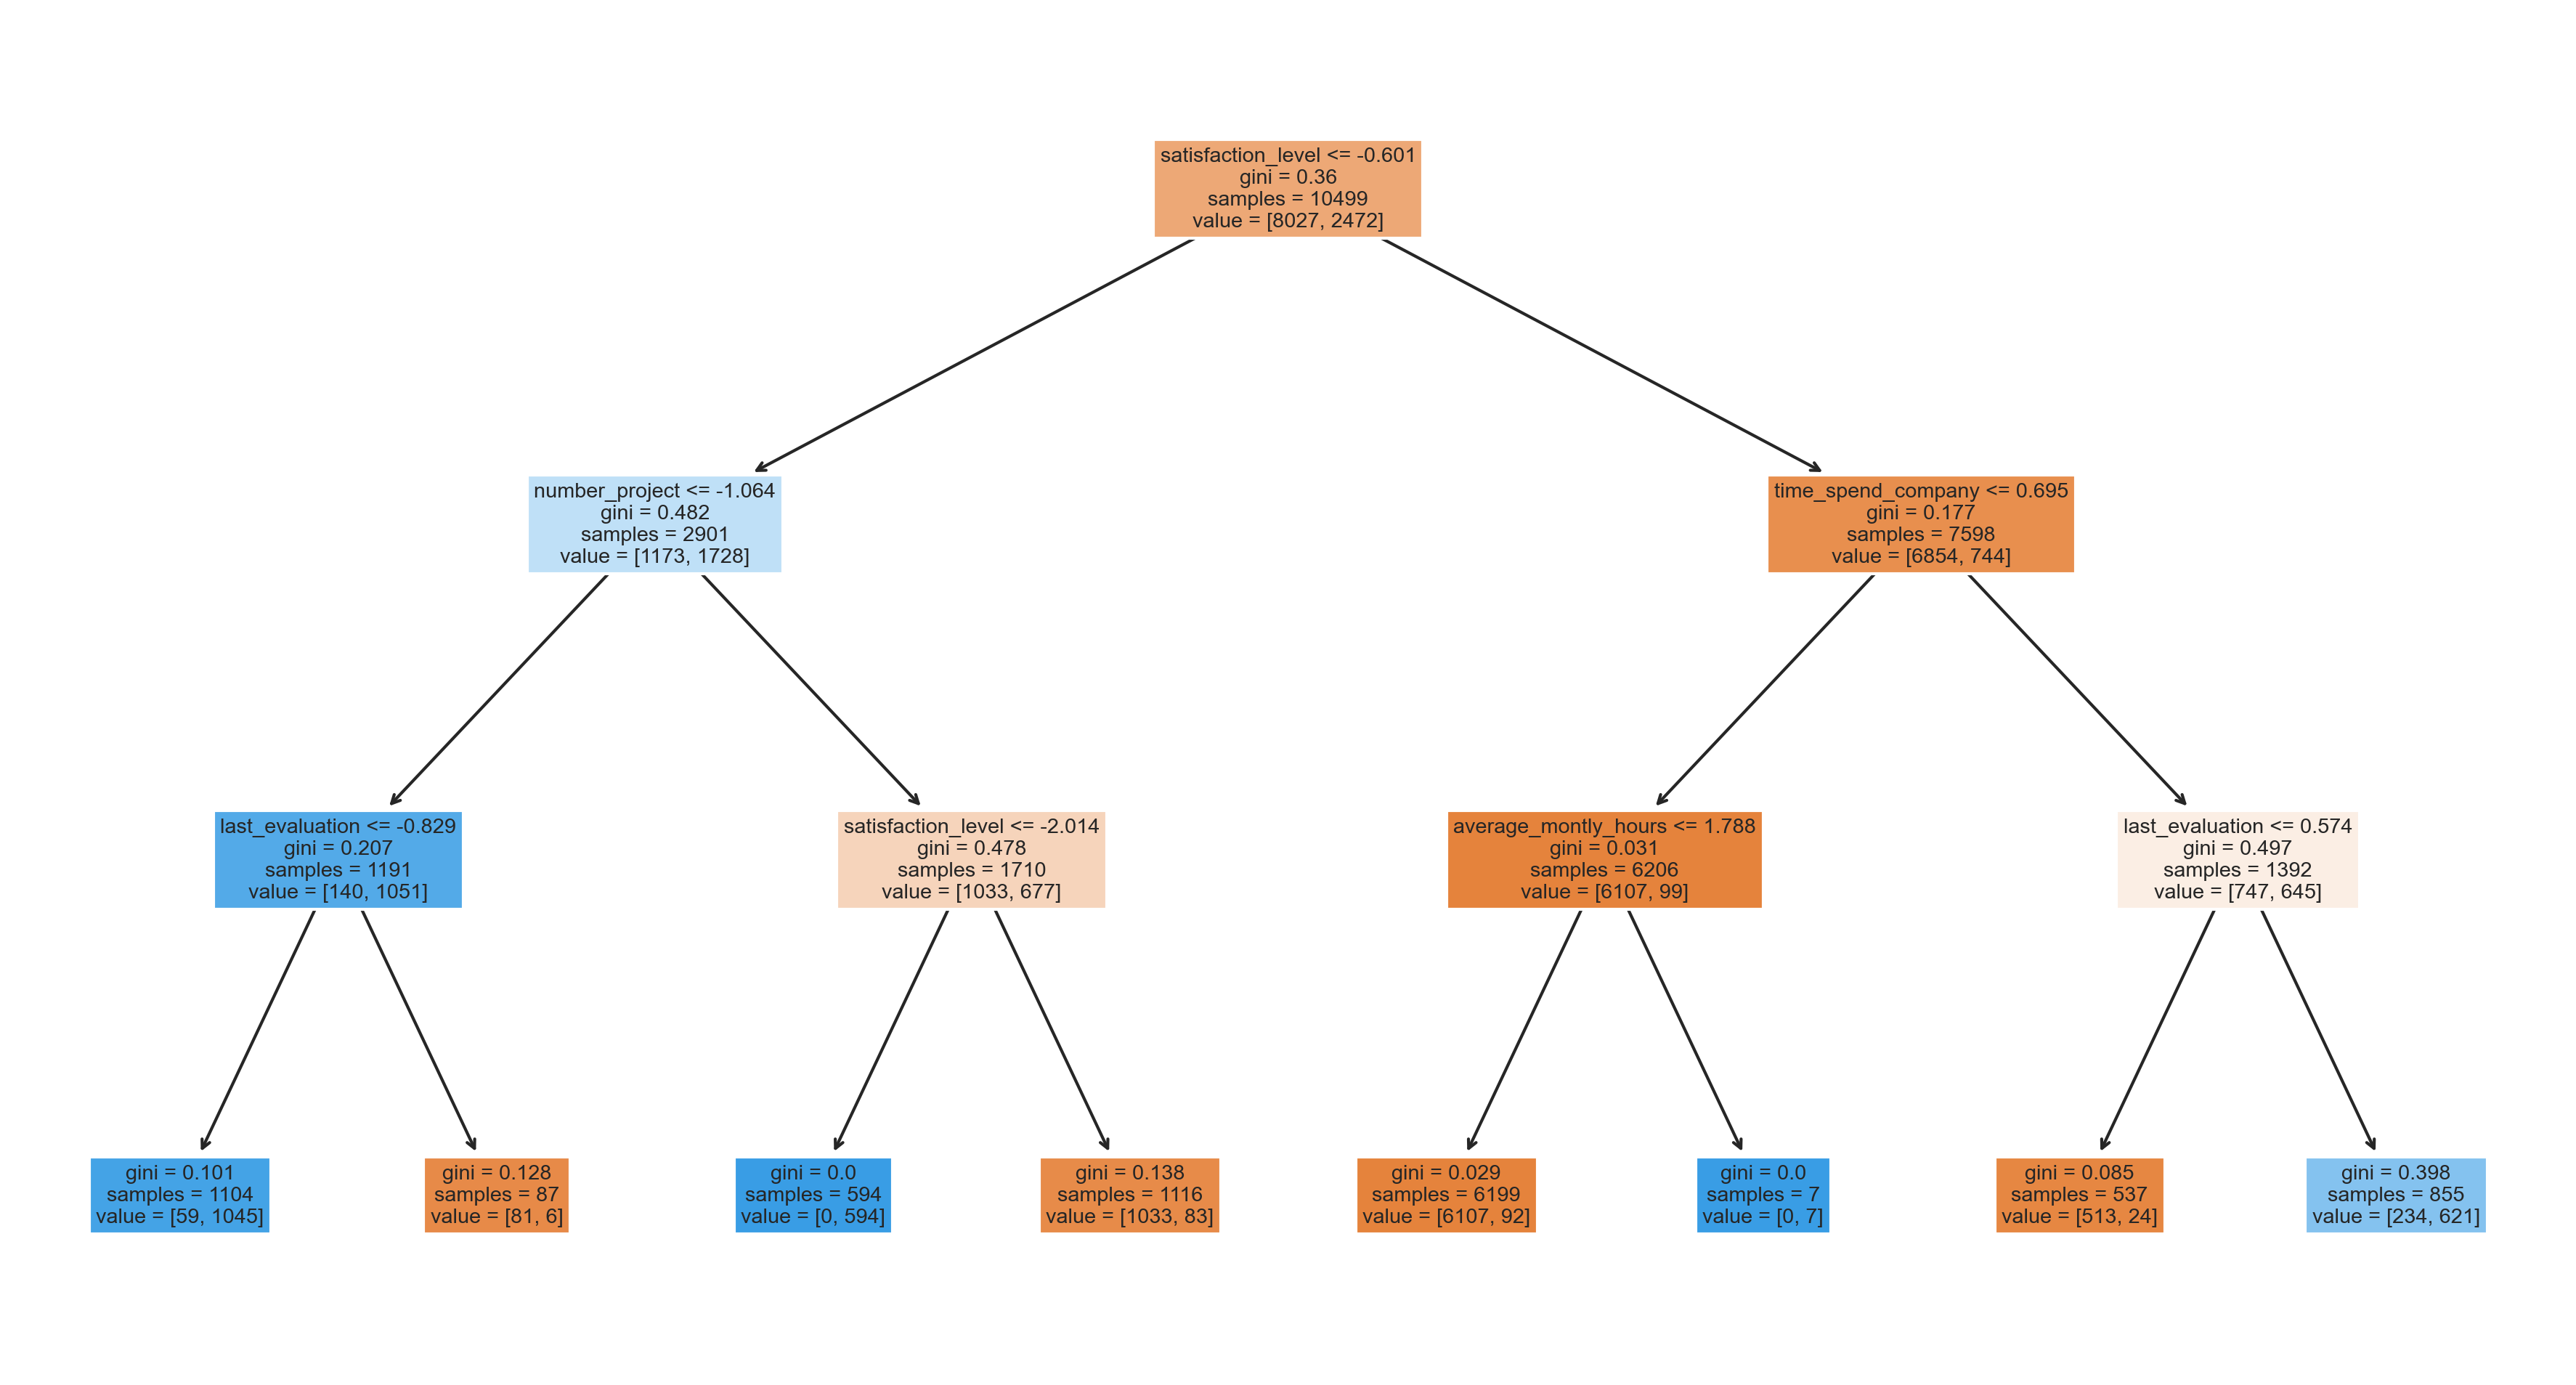

In [32]:
from sklearn import tree
# Setting dpi = 300 to make image clearer than default
fig,axs=plt.subplots(nrows=1,ncols=1,dpi=300,figsize=(15,8))
tree.plot_tree(clf,feature_names=X.columns,filled=True);

## Evaluation : Confusion matrix and ROC-AUC

### Task 5.1 : Confusion matrix : Calculate Accuracy, Recall, F1-score, and Precision.

In [33]:
#Performance metrics of Naive Bayes
from sklearn.metrics import classification_report
print('Naive Bayes Classification Report \n',classification_report(Y_test,Y_pred))

Naive Bayes Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      3401
           1       0.57      0.74      0.65      1099

    accuracy                           0.80      4500
   macro avg       0.74      0.78      0.75      4500
weighted avg       0.83      0.80      0.81      4500



In [34]:
#Performance metrics of Decision Tree
from sklearn.metrics import classification_report
print('Decision Tree Classification Report \n',classification_report(Y_test,Y_pred1))

Decision Tree Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      3401
           1       0.87      0.81      0.84      1099

    accuracy                           0.92      4500
   macro avg       0.91      0.89      0.90      4500
weighted avg       0.92      0.92      0.92      4500



### Task 5.2 : Evaluate ROC and AUC scores

In [35]:
# evaluating roc_auc_score for Naive Bayes
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(Y_test,gnm.predict_proba(X_test)[:,1])
print('ROC Score of Naive Bayes Model : ',round(roc,2))

ROC Score of Naive Bayes Model :  0.85


In [36]:
# evaluating roc_auc_score for Decision Tree
roc=roc_auc_score(Y_test,clf.predict_proba(X_test)[:,1])
print('ROC Score of Naive Bayes Model : ',round(roc,2))

ROC Score of Naive Bayes Model :  0.95


### Task 5.3 : Draw ROC-AUC curve and Interpret the models performane from the curve

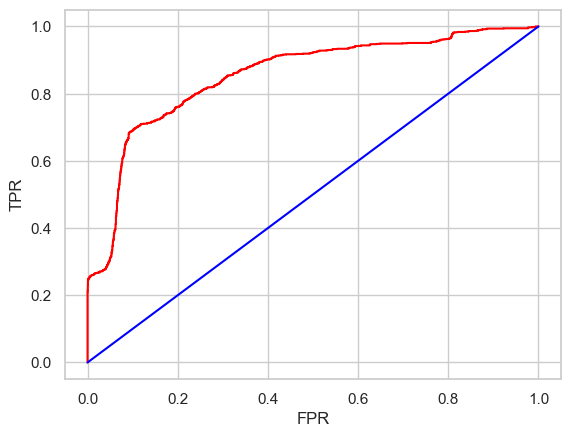

In [37]:
#ROC-AUC curve for Naive Bayes Model
from sklearn.metrics import roc_curve
prob_val=gnm.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,prob_val)
plt.plot(fpr,tpr,color='red',label='roc')
plt.plot([0,1],[0,1],color='blue',label='-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot();

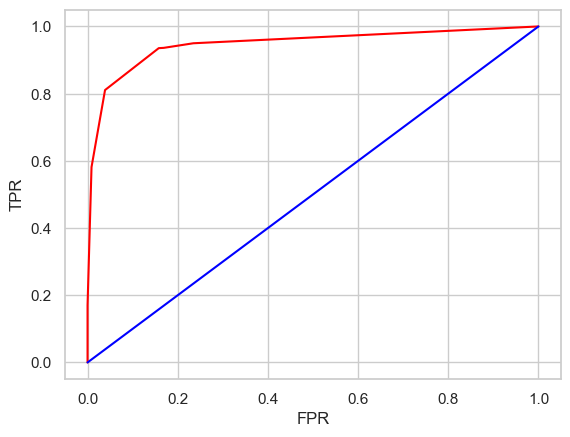

In [38]:
#ROC-AUC curve for Decision Tree Model
from sklearn.metrics import roc_curve
prob_val=clf.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(Y_test,prob_val)
plt.plot(fpr,tpr,color='red',label='roc')
plt.plot([0,1],[0,1],color='blue',label='-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot();

### Task 5.4 : Choose the best model for HR department to decide to retain employees

In [39]:
#Accuracy for Decision Tree model is greater than Naive-Bayes model.Hence Decision Tree model is best model for HR department to decide to retain employees